In [1]:
# import dependencies
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn features
import sklearn

## Import Data
Read in the csv containing the merged data from the weather API and Nest data.

In [2]:
data = pd.read_csv('merged_data.csv')

In [3]:
data.head(10)

,time,summary,icon,nearestStormDistance,nearestStormBearing,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,...,min(als),max(als),min(tp0),max(tp0),min(tp1),max(tp1),min(tp2),max(tp2),min(tp3),max(tp3)
0,2020-11-30 17:30:00,Overcast,cloudy,3,217.0,0.0000,0.00,3.03,-0.30,2.13,...,5.0,66.0,-46.0,46.0,-41.0,42.0,-52.0,44.0,-342.0,50.0
1,2020-11-30 17:45:00,Drizzle,rain,0,NaN,0.0728,0.90,2.91,-0.47,2.08,...,5.0,5.0,-51.0,53.0,-46.0,41.0,-52.0,48.0,-49.0,57.0
2,2020-11-30 18:00:00,Drizzle,rain,0,NaN,0.1156,1.00,2.92,-0.51,2.19,...,3.0,5.0,-51.0,47.0,-50.0,63.0,-48.0,57.0,-53.0,51.0
3,2020-11-30 18:15:00,Drizzle,rain,13,110.0,0.2137,1.00,2.91,-0.58,2.25,...,3.0,4.0,-49.0,46.0,-46.0,43.0,-49.0,47.0,-59.0,52.0
4,2020-11-30 18:30:00,Overcast,cloudy,13,106.0,0.0000,0.00,2.93,-0.66,2.35,...,3.0,4.0,-53.0,43.0,-42.0,46.0,-57.0,51.0,-46.0,46.0
5,2020-11-30 18:45:00,Drizzle,rain,0,NaN,0.2257,1.00,3.18,-0.58,2.21,...,3.0,4.0,-51.0,59.0,-51.0,44.0,-56.0,45.0,-43.0,49.0
6,2020-11-30 19:00:00,Light Rain,rain,0,NaN,0.4295,1.00,3.19,-0.67,2.26,...,3.0,3.0,-51.0,43.0,-40.0,42.0,-44.0,45.0,-49.0,47.0
7,2020-12-01 15:15:00,Drizzle,rain,0,NaN,0.1352,1.00,4.61,2.71,4.61,...,3.0,4.0,-57.0,47.0,-45.0,43.0,-55.0,50.0,-54.0,50.0
8,2020-12-01 15:30:00,Mostly Cloudy,partly-cloudy-day,1,15.0,0.0677,0.18,4.76,2.97,4.76,...,3.0,5.0,-60.0,60.0,-42.0,53.0,-63.0,53.0,-54.0,55.0
9,2020-12-01 15:45:00,Mostly Cloudy,partly-cloudy-day,0,NaN,0.0587,0.01,4.94,3.21,4.94,...,3.0,4.0,-49.0,52.0,-49.0,59.0,-57.0,51.0,-55.0,53.0


## Clean the Data
Remove unnecessary columns with lots of missing values and check for ways to fix missing values (set to zero, median, mean etc.

In [4]:
# update NA values to zero for certain columns
data['precipAccumulation'] = data['precipAccumulation'].fillna(0)  # if precipitation accumulation is NAN assume 0
data['precipIntensity'] = data['precipIntensity'].fillna(0)  # if precipitation intensity is NAN assume 0
data['nearestStormBearing'] = data['nearestStormBearing'].fillna(0)

# drop precipType since it is redundant to icon or summary column
data.drop(['precipType'], axis = 1, inplace = True)
data.drop(['precipIntensityError'], axis = 1, inplace = True)
#data['precipType'] = data['precipType'].fillna('None')  # if precipitation intensity is NAN assume 0

In [5]:
data.head(10)

,time,summary,icon,nearestStormDistance,nearestStormBearing,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,...,min(als),max(als),min(tp0),max(tp0),min(tp1),max(tp1),min(tp2),max(tp2),min(tp3),max(tp3)
0,2020-11-30 17:30:00,Overcast,cloudy,3,217.0,0.0000,0.00,3.03,-0.30,2.13,...,5.0,66.0,-46.0,46.0,-41.0,42.0,-52.0,44.0,-342.0,50.0
1,2020-11-30 17:45:00,Drizzle,rain,0,0.0,0.0728,0.90,2.91,-0.47,2.08,...,5.0,5.0,-51.0,53.0,-46.0,41.0,-52.0,48.0,-49.0,57.0
2,2020-11-30 18:00:00,Drizzle,rain,0,0.0,0.1156,1.00,2.92,-0.51,2.19,...,3.0,5.0,-51.0,47.0,-50.0,63.0,-48.0,57.0,-53.0,51.0
3,2020-11-30 18:15:00,Drizzle,rain,13,110.0,0.2137,1.00,2.91,-0.58,2.25,...,3.0,4.0,-49.0,46.0,-46.0,43.0,-49.0,47.0,-59.0,52.0
4,2020-11-30 18:30:00,Overcast,cloudy,13,106.0,0.0000,0.00,2.93,-0.66,2.35,...,3.0,4.0,-53.0,43.0,-42.0,46.0,-57.0,51.0,-46.0,46.0
5,2020-11-30 18:45:00,Drizzle,rain,0,0.0,0.2257,1.00,3.18,-0.58,2.21,...,3.0,4.0,-51.0,59.0,-51.0,44.0,-56.0,45.0,-43.0,49.0
6,2020-11-30 19:00:00,Light Rain,rain,0,0.0,0.4295,1.00,3.19,-0.67,2.26,...,3.0,3.0,-51.0,43.0,-40.0,42.0,-44.0,45.0,-49.0,47.0
7,2020-12-01 15:15:00,Drizzle,rain,0,0.0,0.1352,1.00,4.61,2.71,4.61,...,3.0,4.0,-57.0,47.0,-45.0,43.0,-55.0,50.0,-54.0,50.0
8,2020-12-01 15:30:00,Mostly Cloudy,partly-cloudy-day,1,15.0,0.0677,0.18,4.76,2.97,4.76,...,3.0,5.0,-60.0,60.0,-42.0,53.0,-63.0,53.0,-54.0,55.0
9,2020-12-01 15:45:00,Mostly Cloudy,partly-cloudy-day,0,0.0,0.0587,0.01,4.94,3.21,4.94,...,3.0,4.0,-49.0,52.0,-49.0,59.0,-57.0,51.0,-55.0,53.0


## Convert Categorical Data to Numerical
In order to properly train a model we want to convert all of our dataframe columns that hold categorical data (ex. rainy, cloudy etc) into numerical data. 

There are several techniques to do so. The one I will be using is one hot encoding. This technique makes sure each different categorical value is weighted the same which the technique label encoding does not do.

One hot encoding adds additional feature columns to the dataset.

In [6]:
# summary column one hot encoding
summary_encode = pd.get_dummies(data.summary, prefix='summary')
# icon column one hot encoding
icon_encode = pd.get_dummies(data.icon, prefix='icon')
icon_encode.head()

,icon_clear-day,icon_clear-night,icon_cloudy,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_snow
0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0


In [7]:
# concat the one hot encoded columns onto our data and drop the original column
data = pd.concat([data, summary_encode], axis=1)
data = pd.concat([data, icon_encode], axis=1)
data.drop(['summary'], axis = 1, inplace=True)
data.drop(['icon'], axis = 1, inplace=True)
data.head()

,time,nearestStormDistance,nearestStormBearing,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,summary_Possible Drizzle,summary_Possible Flurries,summary_Rain,icon_clear-day,icon_clear-night,icon_cloudy,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_snow
0,2020-11-30 17:30:00,3,217.0,0.0000,0.0,3.03,-0.30,2.13,0.94,1007.6,...,0,0,0,0,0,1,0,0,0,0
1,2020-11-30 17:45:00,0,0.0,0.0728,0.9,2.91,-0.47,2.08,0.94,1007.2,...,0,0,0,0,0,0,0,0,1,0
2,2020-11-30 18:00:00,0,0.0,0.1156,1.0,2.92,-0.51,2.19,0.95,1006.8,...,0,0,0,0,0,0,0,0,1,0
3,2020-11-30 18:15:00,13,110.0,0.2137,1.0,2.91,-0.58,2.25,0.95,1006.4,...,0,0,0,0,0,0,0,0,1,0
4,2020-11-30 18:30:00,13,106.0,0.0000,0.0,2.93,-0.66,2.35,0.96,1005.8,...,0,0,0,0,0,1,0,0,0,0


## Data Exploration
Let's take a quick glance at the properties of our dataset in more detail.

In [8]:
# let's replace all our empty string cells with NaN and then drop them
data.replace('', np.nan, inplace=True)
data = data.dropna(axis = 0)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nearestStormDistance,2522.0,65.488898,50.036338,0.000,14.0000,64.000,112.0000,248.0000
nearestStormBearing,2522.0,149.210547,73.014344,0.000,132.0000,168.000,180.0000,357.0000
precipIntensity,2522.0,0.030123,0.145888,0.000,0.0000,0.000,0.0000,3.1955
precipProbability,2522.0,0.105226,0.294530,0.000,0.0000,0.000,0.0000,1.0000
temperature,2522.0,-2.856376,4.876273,-16.140,-6.0750,-2.430,0.7700,8.4800
apparentTemperature,2522.0,-7.061463,6.062284,-22.910,-11.0800,-7.080,-2.5300,5.9800
dewPoint,2522.0,-5.738382,6.364397,-21.540,-10.1600,-5.365,-0.5300,8.0800
humidity,2522.0,0.810599,0.123132,0.430,0.7200,0.810,0.9200,1.0000
pressure,2522.0,1014.602379,9.389654,992.200,1008.7000,1013.300,1021.1000,1035.8000
windSpeed,2522.0,12.668692,5.551586,2.410,7.9800,12.430,16.4700,26.8500


## Splitting the Data
Will split the data into 70% training data, 15% for validation,and 15% for testing.

In [9]:
data.drop(['time'], axis = 1, inplace = True)
column_indices = {name: i for i, name in enumerate(data.columns)}

size = len(data)
train_df = data[0:int(size * 0.7)]
val_df = data[int(size * 0.7):int(size * 0.85)]
test_df = data[int(size * 0.85):]

num_features = data.shape[1]

## Normalizing the Data
Normalizing the data is a useful step to bring all the features into similar ranges of value so that one doesn't have a greater impact on the data then the others.

For normalization let's use the technique of subtracting the mean and dividing by the standard deviation of each feature. 

**This is commonly known as Z-score normalization.**

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

In [10]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

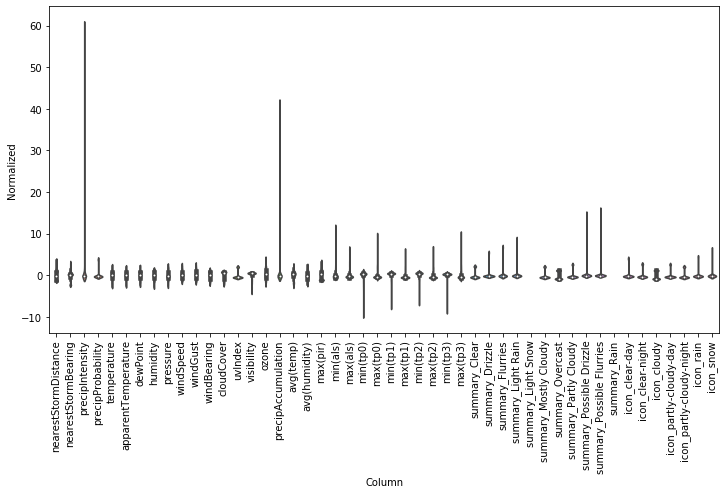

In [11]:
df_std = (data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(data.keys(), rotation=90)

Might want to look into removing the features with the long wicks.

## Window Generation
We need to generate a window that we will make a prediction based off of and that will slide through our data.

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data.

In [ ]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns = None):
        # store data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        